In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


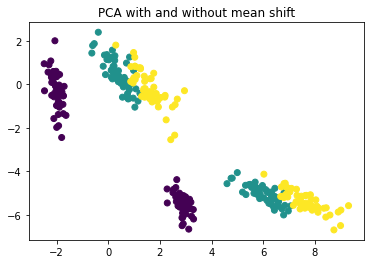

In [2]:
X, y_true = load_iris(return_X_y=True)

n_components = 2

cov_mat = np.cov(X, rowvar=False)
eig_values, eig_vectors = np.linalg.eig(cov_mat)
vector_columns = np.argsort(eig_values)[-n_components:]
n_vectors = eig_vectors[:,vector_columns]
X1 = np.dot(X, n_vectors)
plt.scatter(X1[:,1], X1[:,0], c=y_true)
# plt.show()


mmscaler = MinMaxScaler()
X_mean_shift = mmscaler.fit_transform(X)

sscaler = StandardScaler()
X_mean_shift = sscaler.fit_transform(X)

# X_mean = X.mean(axis=0)
# X_sigma = np.std(X, axis=0)
# X_mean_shift = (X - X_mean)/X_sigma

cov_mat_mean_shift = np.cov(X_mean_shift, rowvar=False)
eig_values_mean_shift, eig_vectors_mean_shift = np.linalg.eig(cov_mat_mean_shift)
vector_columns_mean_shift = np.argsort(eig_values_mean_shift)[-n_components:]
n_vectors_mean_shift = eig_vectors[:,vector_columns_mean_shift]
X1_mean_shift = np.dot(X_mean_shift, n_vectors_mean_shift)
plt.scatter(X1_mean_shift[:,1], X1_mean_shift[:,0], c=y_true)
plt.title("PCA with and without mean shift")
plt.show()


In [3]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.n_vectors = None

    def fit(self, X):
        X_mean = X.mean(axis=0)
        X_sigma = np.std(X, axis=0)
        X = (X - X_mean)/X_sigma
        cov_mat = np.cov(X, rowvar=False)
        eig_values, eig_vectors = np.linalg.eig(cov_mat)
        vector_columns = np.argsort(eig_values)[-self.n_components:]
        self.n_vectors = eig_vectors[:,vector_columns]

    def transform(self, X):
        X1 = np.dot(X, self.n_vectors)
        return X1


0.9473684210526315


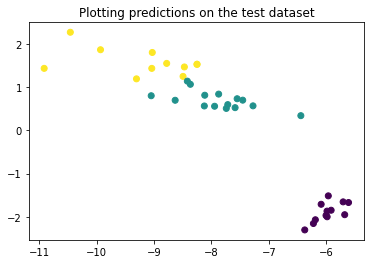

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X1, y_true, shuffle=True)

pca = PCA()
pca.fit(X_train)
X_train1 = pca.transform(X_train)
X_test1 = pca.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train1, y_train)

print(clf.score(X_test1, y_test))

plt.scatter(X_test1[:,1], X_test1[:,0], c=clf.predict(X_test1))
plt.title("Plotting predictions on the test dataset")
plt.show()
